# matplotlib

In [175]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; margin-left:350px; }</style>"))
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
pd.set_option( 'display.notebook_repr_html', False)  # render Series and DataFrame as text, not HTML
pd.set_option( 'display.max_column', 10)    # number of columns
pd.set_option( 'display.max_rows', 10)     # number of rows
pd.set_option( 'display.width', 90)        # number of characters per row

## Library

In [176]:
import matplotlib
import matplotlib.pyplot as plt

from plydata import define, query, select, group_by, summarize, arrange, head, rename
import plotnine
from plotnine import *

## Sample Data
This chapter uses the sample data generate with below code. The idea is to simulate two categorical-alike feature, and two numeric value feature:

- com is random character between ‘C1’, ‘C2’ and ‘C3’    
- dept is random character between ‘D1’, ‘D2’, ‘D3’, ‘D4’ and ‘D5’  
- grp is random character with randomly generated ‘G1’, ‘G2’  
- value1 represents numeric value, normally distributed at mean 50  
- value2 is numeric value, normally distributed at mean 25  

In [177]:
n = 200
comp = ['C' + i for i in np.random.randint( 1,4, size  = n).astype(str)] # 3x Company
dept = ['D' + i for i in np.random.randint( 1,6, size  = n).astype(str)] # 5x Department
grp =  ['G' + i for i in np.random.randint( 1,3, size  = n).astype(str)] # 2x Groups
value1 = np.random.normal( loc=50 , scale=5 , size = n)
value2 = np.random.normal( loc=20 , scale=3 , size = n)
value3 = np.random.normal( loc=5 , scale=30 , size = n)

mydf = pd.DataFrame({
    'comp':comp, 
    'dept':dept, 
    'grp': grp,
    'value1':value1, 
    'value2':value2,
    'value3':value3 })
mydf.head()

  comp dept grp     value1     value2     value3
0   C3   D4  G2  49.259153  17.587988  19.092745
1   C2   D5  G1  52.631445  20.660326   8.084155
2   C3   D5  G2  58.203905  20.580107  -4.092313
3   C1   D1  G1  43.757573  17.453912 -25.390765
4   C3   D2  G2  45.935129  24.022889   9.566659

In [178]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
comp      200 non-null object
dept      200 non-null object
grp       200 non-null object
value1    200 non-null float64
value2    200 non-null float64
value3    200 non-null float64
dtypes: float64(3), object(3)
memory usage: 9.5+ KB


## MATLAB-like API

- The good thing about the pylab MATLAB-style API is that it is easy to get started with if you are familiar with MATLAB, and it has a minumum of coding overhead for simple plots.  
- However, I'd encourrage not using the MATLAB compatible API for anything but the simplest figures.  
- Instead, I recommend learning and using matplotlib's object-oriented plotting API. It is remarkably powerful. For advanced figures with subplots, insets and other components it is very nice to work with.

### Sample Data

In [179]:
# Sample Data
x = np.linspace(0,5,10)
y = x ** 2

### Single Plot

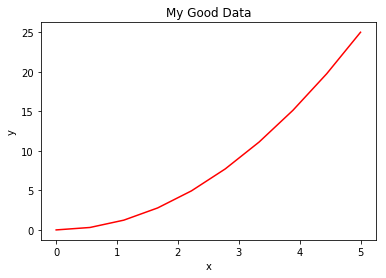

In [180]:
plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,'red')
plt.title('My Good Data');

### Multiple Subplots
Each call lto **subplot()** will create a new container for subsequent plot command 

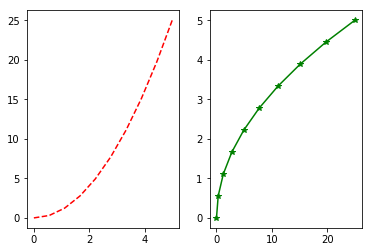

In [181]:
plt.figure()
plt.subplot(1,2,1) # 1 row, 2 cols, at first box
plt.plot(x,y,'r--')
plt.subplot(1,2,2) # 1 row, 2 cols, at second box
plt.plot(y,x,'g*-');

## Object-Oriented API

### Sample Data

In [182]:
# Sample Data
x = np.linspace(0,5,10)
y = x ** 2

### Single Plot
**One figure, one axes**

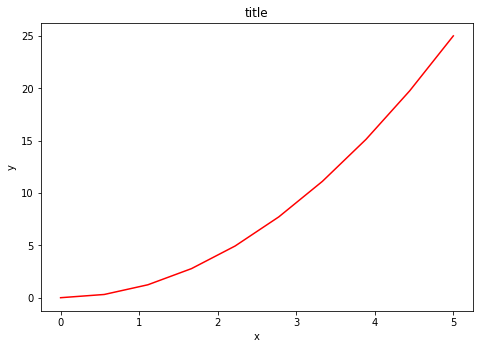

In [183]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1]) # left, bottom, width, height (range 0 to 1)
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

### Multiple Axes In One Plot
- This is still considered a **single plot**, but with **multiple axes**

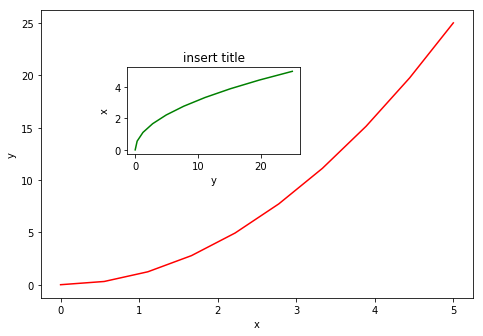

In [184]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])         # main axes
ax2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

ax1.plot(x,y,'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.plot(y, x, 'g')
ax2.set_xlabel('y')
ax2.set_ylabel('x')
ax2.set_title('insert title');

### Multiple Subplots
- One **figure**  can contain multiple **subplots**  
- Each subplot has **one axes**

#### Simple Subplots - all same size 
- subplots() function return axes object that is iterable.  

**Single Row Grid**  
Single row grid means axes is an 1-D array. Hence can use **for** to iterate through axes

(3,)


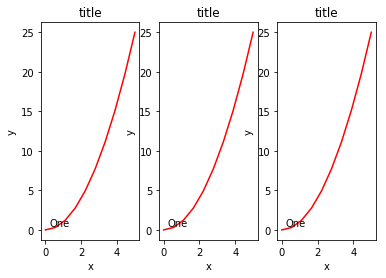

In [185]:
fig, axes = plt.subplots( nrows=1,ncols=3 )
print (axes.shape)
for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    ax.text(0.2,0.5,'One')

**Multiple Row Grid**  
Multile row grid means axes is an 2-D array. Hence can use two levels of **for** loop to iterate through each row and column

(2, 3)


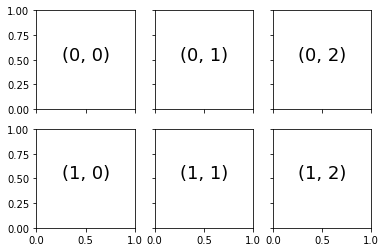

In [186]:
fig, axes = plt.subplots(2, 3, sharex='col', sharey='row')
print (axes.shape)
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        axes[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')

#### Complicated Subplots - different size
- **GridSpec** specify grid size of the figure  
- Manually specify each subplot and their relevant grid position and size

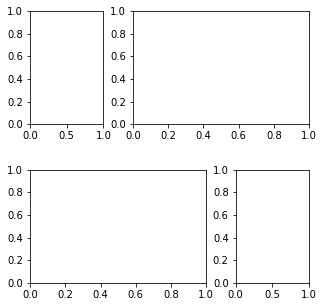

In [187]:
plt.figure(figsize=(5,5))
grid = plt.GridSpec(2, 3, hspace=0.4, wspace=0.4)
plt.subplot(grid[0, 0])  #row 0, col 0
plt.subplot(grid[0, 1:]) #row 0, col 1 to :
plt.subplot(grid[1, :2]) #row 1, col 0:2 
plt.subplot(grid[1, 2]); #row 1, col 2

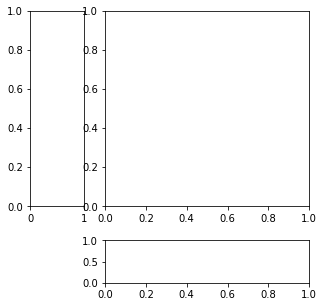

In [188]:
plt.figure(figsize=(5,5))
grid = plt.GridSpec(4, 4, hspace=0.8, wspace=0.4)
plt.subplot(grid[:3, 0])    # row 0:3, col 0
plt.subplot(grid[:3, 1: ])  # row 0:3, col 1:
plt.subplot(grid[3, 1: ]);  # row 3,   col 1:

**-1 means last row or column**

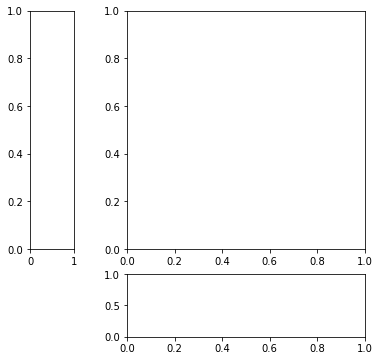

In [189]:
plt.figure(figsize=(6,6))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=1.2)
plt.subplot(grid[:-1, 0 ])  # row 0 till last row (not including last row), col 0
plt.subplot(grid[:-1, 1:])  # row 0 till last row (not including last row), col 1 till end
plt.subplot(grid[-1, 1: ]); # row last row, col 1 till end

### Figure Customization

#### Avoid Overlap - Use tight_layout()
Sometimes when the figure size is too small, plots will overlap each other. 
- **tight_layout()** will introduce extra white space in between the subplots to avoid overlap.  
- The figure became wider.

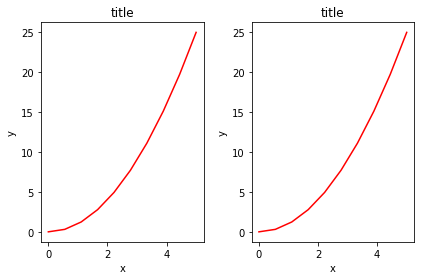

In [190]:
fig, axes = plt.subplots( nrows=1,ncols=2)
for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
fig.tight_layout() # adjust the positions of axes so that there is no overlap

#### Avoid Overlap - Change Figure Size

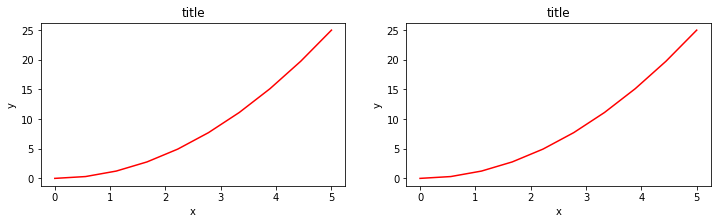

In [191]:
fig, axes = plt.subplots( nrows=1,ncols=2,figsize=(12,3))
for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

#### Text Within Figure

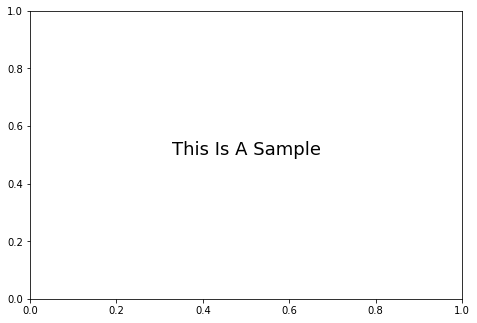

In [192]:
fig = plt.figure()
fig.text(0.5, 0.5, 'This Is A Sample',fontsize=18, ha='center');
axes = fig.add_axes([0,0,1,1]) # left, bottom, width, height (range 0 to 1)

### Axes Customization

#### Y-Axis Limit

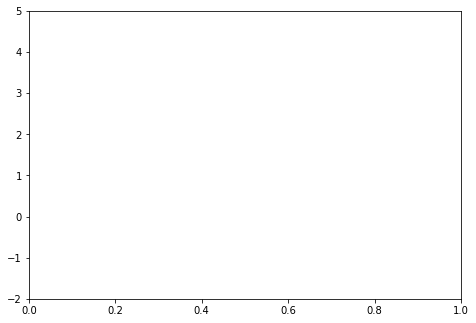

In [193]:
fig = plt.figure()
fig.add_axes([0,0,1,1], ylim=(-2,5));

#### Text Within Axes

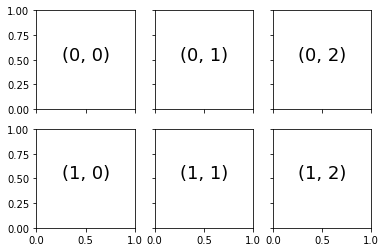

In [194]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')

Text(0.5,0.5,'one')

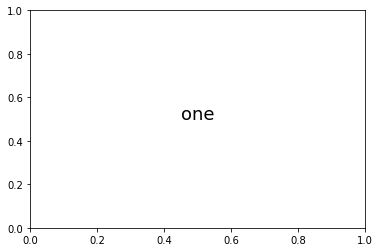

In [195]:
plt.text(0.5, 0.5, 'one',fontsize=18, ha='center')

#### Share Y Axis Label

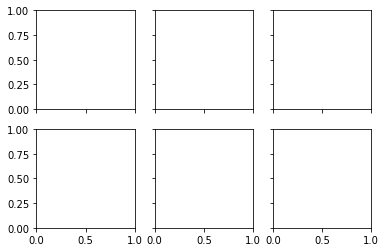

In [196]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row') # removed inner label

#### Create Subplot Individually
Each call lto **subplot()** will create a new container for subsequent plot command 

Text(0.5,0.5,'eight')

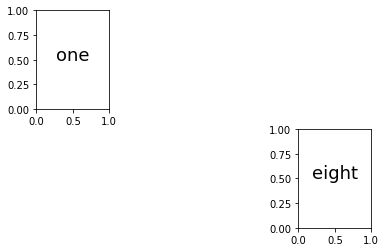

In [197]:
plt.subplot(2,4,1)
plt.text(0.5, 0.5, 'one',fontsize=18, ha='center')

plt.subplot(2,4,8)
plt.text(0.5, 0.5, 'eight',fontsize=18, ha='center')

**Iterate through subplots (ax) to populate them**

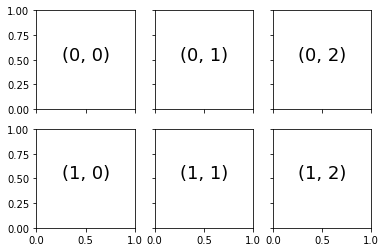

In [198]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')

## Histogram

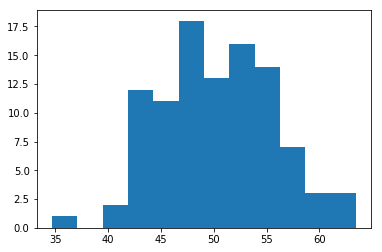

In [271]:
plt.hist(mydf.value1, bins=12);

## Scatter Plot

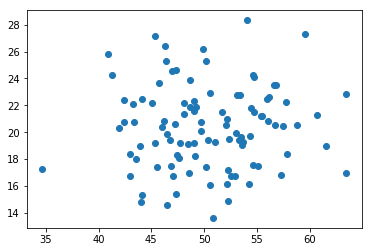

In [276]:
plt.scatter(mydf.value1, mydf.value2);

## Bar Chart

In [315]:
com_grp = mydf.groupby('comp')
grpdf = com_grp['value1'].sum().reset_index()
grpdf

  comp       value1
0   C1  1412.606519
1   C2  2088.746830
2   C3  1532.740700

Text(0,0.5,'Sum of Value 1')

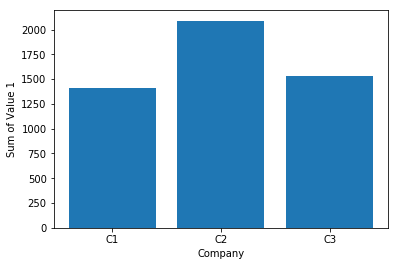

In [290]:
plt.bar(grpdf.comp, grpdf.value1);
plt.xlabel('Company')
plt.ylabel('Sum of Value 1')

# seaborn

## Seaborn and Matplotlib
- seaborn **returns a matplotlib object** that can be modified by the options in the pyplot module  
- Often, these options are wrapped by seaborn and  .plot() in pandas and available as arguments

## Sample Data

In [199]:
n = 100
comp = ['C' + i for i in np.random.randint( 1,4, size  = n).astype(str)] # 3x Company
dept = ['D' + i for i in np.random.randint( 1,4, size  = n).astype(str)] # 5x Department
grp =  ['G' + i for i in np.random.randint( 1,4, size  = n).astype(str)] # 2x Groups
value1 = np.random.normal( loc=50 , scale=5 , size = n)
value2 = np.random.normal( loc=20 , scale=3 , size = n)
value3 = np.random.normal( loc=5 , scale=30 , size = n)

mydf = pd.DataFrame({
    'comp':comp, 
    'dept':dept, 
    'grp': grp,
    'value1':value1, 
    'value2':value2,
    'value3':value3 
})
mydf.head()

  comp dept grp     value1     value2     value3
0   C1   D2  G2  47.432744  18.323433  42.768271
1   C2   D1  G3  46.153260  20.852176  17.194632
2   C2   D2  G3  46.309545  26.438398  31.674028
3   C2   D3  G2  34.668435  17.262189  18.806680
4   C3   D3  G2  46.021468  20.394564  48.391633

## Scatter Plot
### 2x Numeric

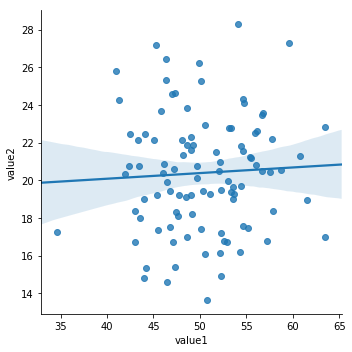

In [200]:
sns.lmplot(x='value1', y='value2', data=mydf);

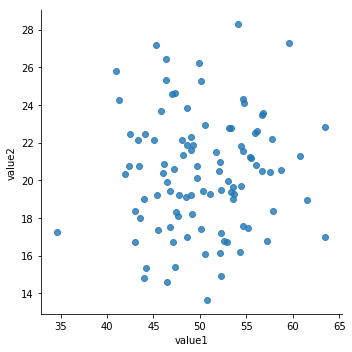

In [201]:
sns.lmplot(x='value1', y='value2', fit_reg=False, data=mydf);  #hide regresion line

### 2xNumeric + 1x Categorical
Use **hue** to represent additional categorical feature

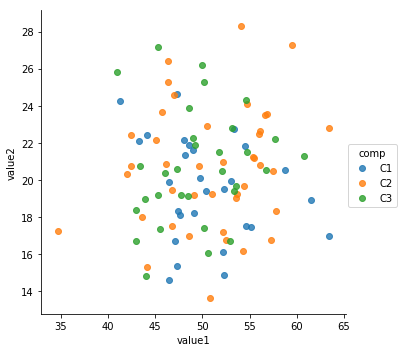

In [202]:
sns.lmplot(x='value1', y='value2', data=mydf, hue='comp', fit_reg=False);

### 2xNumeric + 2x Categorical
Use **col** and **hue** to represent two categorical features

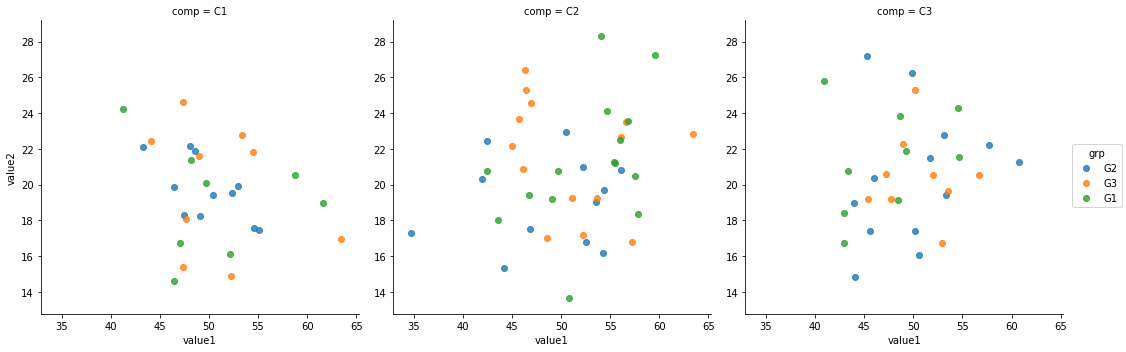

In [203]:
sns.lmplot(x='value1', y='value2', col='comp',hue='grp', fit_reg=False, data=mydf);

### 2xNumeric + 3x Categorical
Use **row, col** and **hue** to represent three categorical features

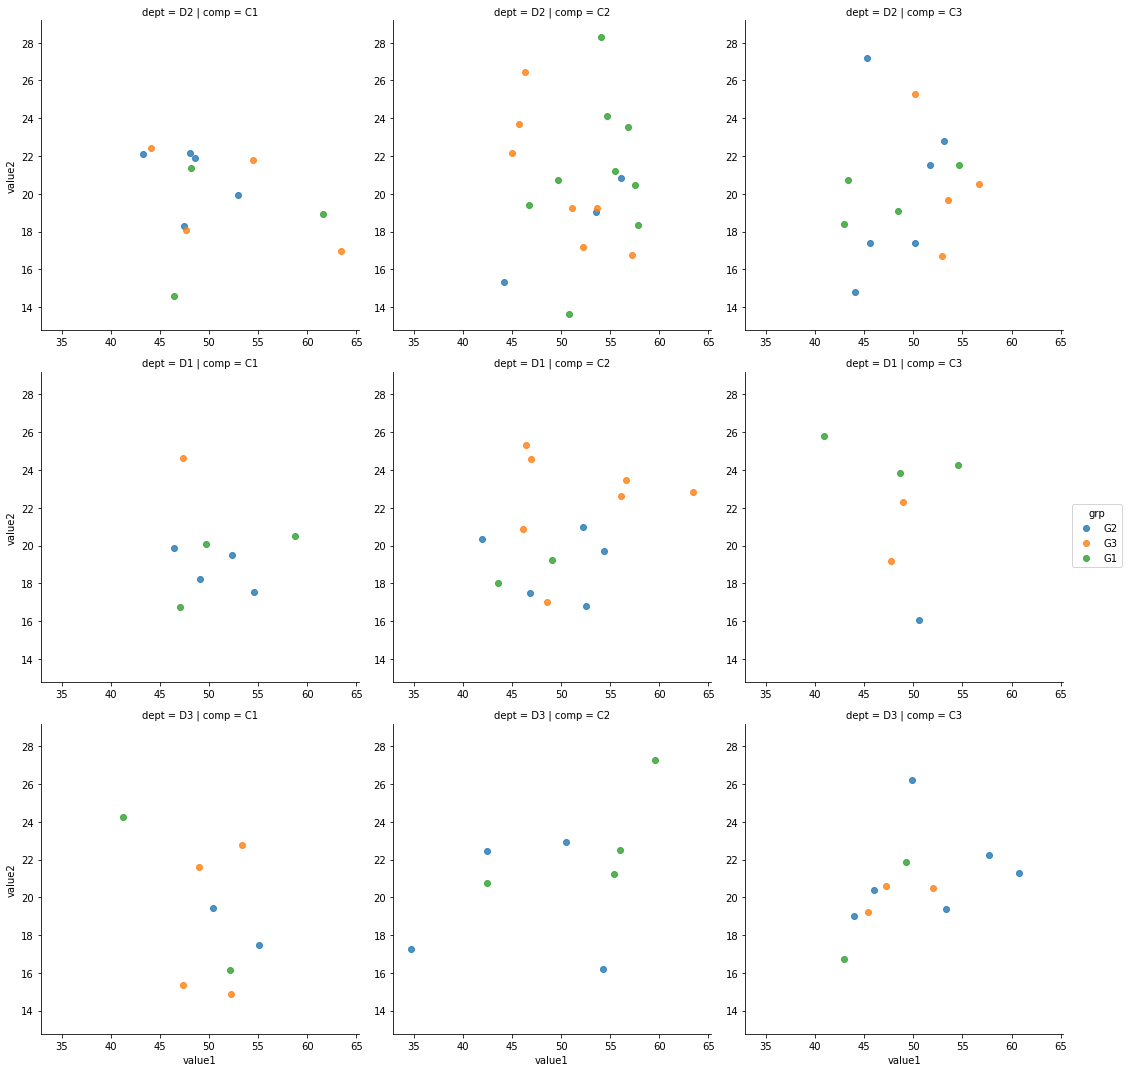

In [204]:
sns.lmplot(x='value1', y='value2', row='dept',col='comp', hue='grp', fit_reg=False, data=mydf);

### Customization

#### size
size: **height** in inch for each facet

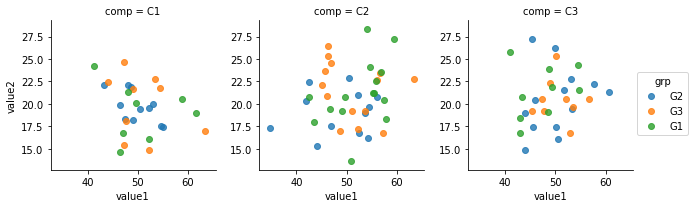

In [205]:
sns.lmplot(x='value1', y='value2', col='comp',hue='grp', size=3,fit_reg=False, data=mydf);

Observe that even **size is very large**, lmplot will **fit (shrink) everything into one row** by deafult. See example below.

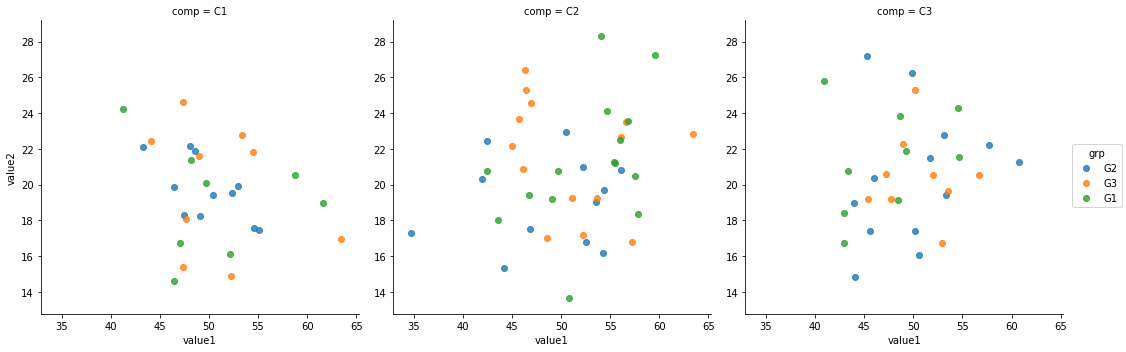

In [206]:
sns.lmplot(x='value1', y='value2', col='comp',hue='grp', size=5,fit_reg=False, data=mydf);

#### col_wrap

To avoid lmplot from shrinking the chart, we use **col_wrap=<col_number** to wrap the output.  
Compare the size (height of each facet) with the above **without** col_wrap. Below chart is larger.

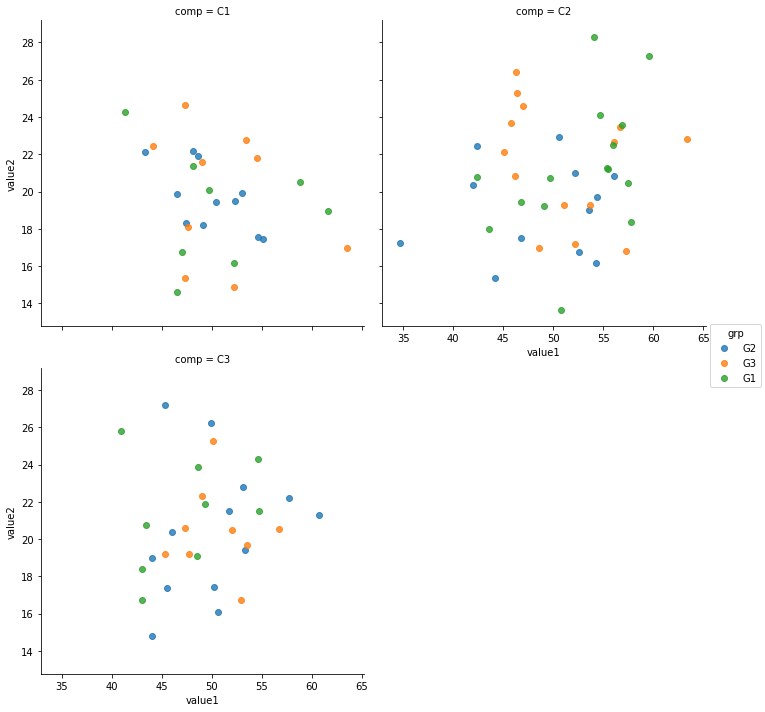

In [207]:
sns.lmplot(x='value1', y='value2', col='comp',hue='grp', size=5, col_wrap=2, fit_reg=False, data=mydf);

## Histogram
```
seaborn.distplot(
  a,               # Series, 1D Array or List
  bins=None,
  hist=True,
  rug = False,
  vertical=False
)
```

### 1x Numeric

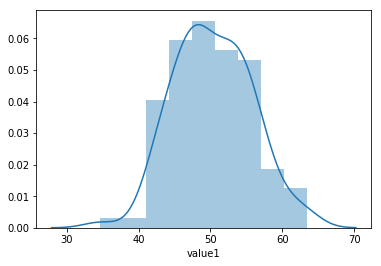

In [208]:
sns.distplot(mydf.value1)

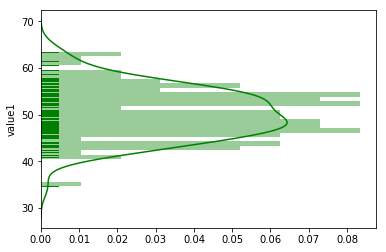

In [209]:
sns.distplot(mydf.value1,hist=True,rug=True,vertical=True, bins=30,color='g')

## Bar Chart

In [316]:
com_grp = mydf.groupby('comp')
grpdf = com_grp['value1'].sum().reset_index()
grpdf

  comp       value1
0   C1  1412.606519
1   C2  2088.746830
2   C3  1532.740700

### 1x Categorical, 1x Numeric

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


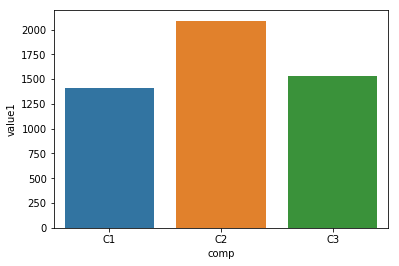

In [317]:
sns.barplot(x='comp',y='value1',data=grpdf)

### Customization

#### Ordering

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


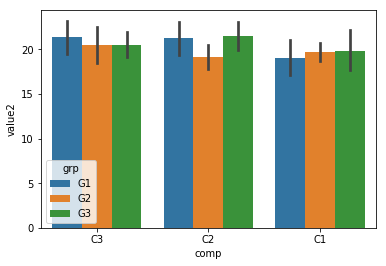

In [237]:
sns.barplot(x='comp',y='value2', hue='grp',
            order=['C3','C2','C1'],
            hue_order=['G1','G2','G3'],
            data=mydf
)

#### Flipping X/Y Axis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


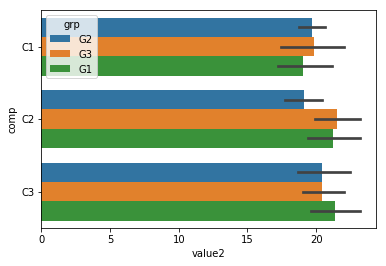

In [238]:
sns.barplot(x='value2',y='comp', hue='grp',data=mydf)

## Faceting
Faceting in Seaborn is a generic function that works with matplotlib various plot utility.  
It support matplotlib as well as seaborn plotting utility. 

### Faceting Histogram

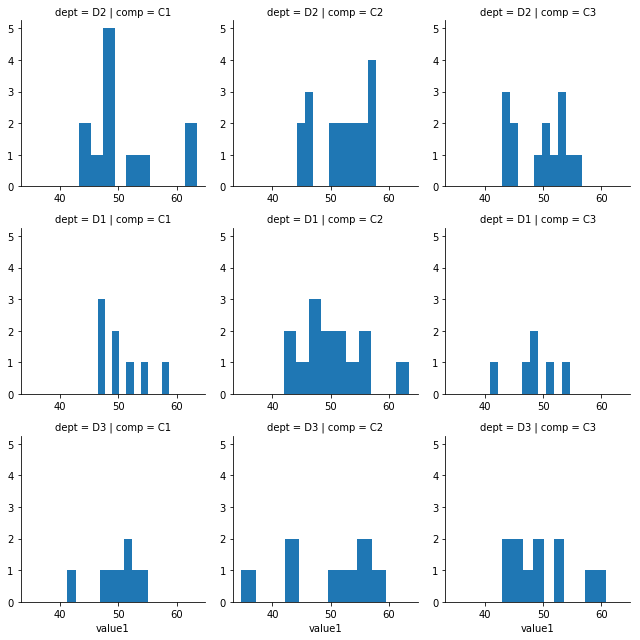

In [256]:
g = sns.FacetGrid(mydf, col="comp", row='dept')
g.map(plt.hist, "value1");

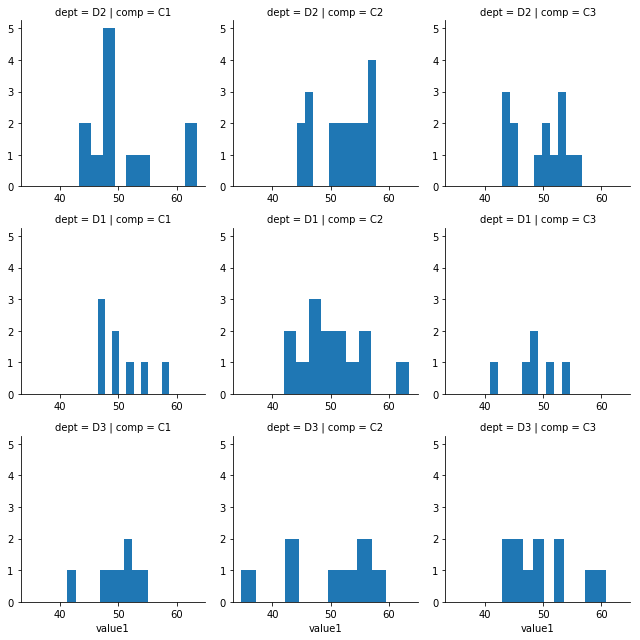

In [258]:
g = sns.FacetGrid(mydf, col="comp", row='dept')
g.map(plt.hist, "value1");

### Faceting Scatter Plot

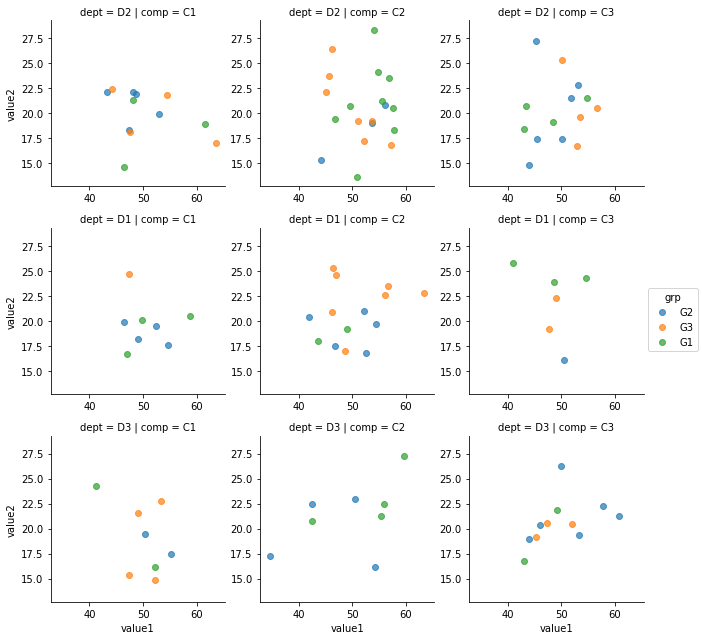

In [296]:
g = sns.FacetGrid(mydf, col="comp", row='dept',hue='grp')
g.map(plt.scatter, "value1","value2",alpha=0.7);
g.add_legend()

## Pair Grid

### Simple Pair Grid

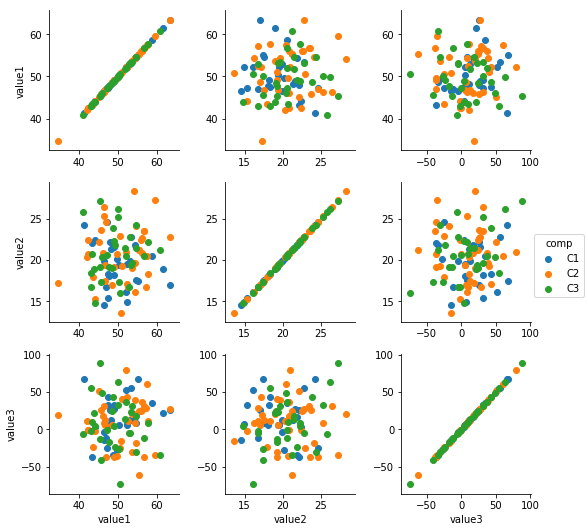

In [304]:
g = sns.PairGrid(mydf, hue='comp')
g.map(plt.scatter);
g.add_legend()

### Different Diag and OffDiag

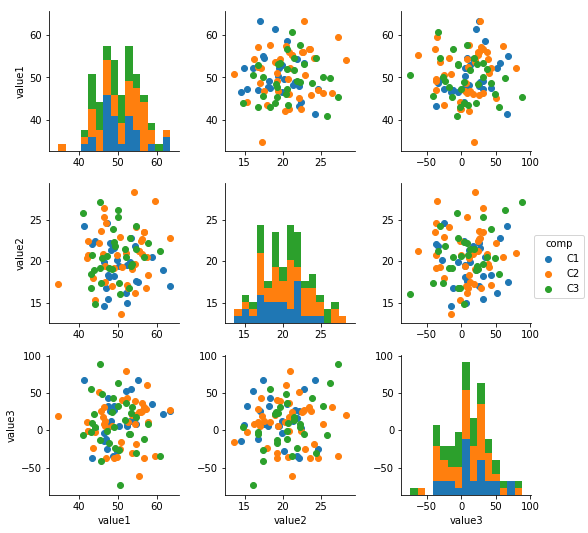

In [306]:
g = sns.PairGrid(mydf, hue='comp')
g.map_diag(plt.hist, bins=15)
g.map_offdiag(plt.scatter);
g.add_legend();

# plotnine

## Histogram

### 1xNumeric

```
plotnine.ggplot( dataframe, aex(x='colName')) + geom_histogram( bins=10 )
plotnine.ggplot( dataframe, aex(x='colName')) + geom_histogram( binwidth=? )
```

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:90: UserWarning: 'stat_bin()' using 'bins = 9'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


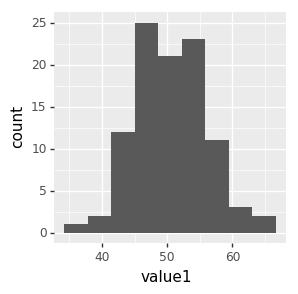

<ggplot: (-9223371910833822292)>

In [211]:
plotnine.options.figure_size = (3, 3)
ggplot(mydf, aes(x='value1')) + geom_histogram()  # default bins = 10

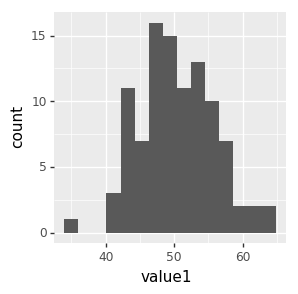

<ggplot: (126021179582)>

In [212]:
ggplot(mydf, aes(x='value1')) + geom_histogram(bins = 15)

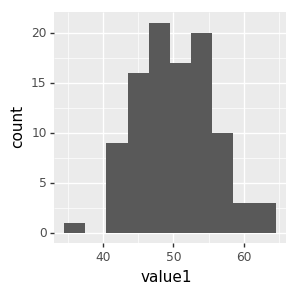

<ggplot: (-9223371910833576518)>

In [213]:
ggplot(mydf, aes(x='value1')) + geom_histogram(binwidth = 3)

### 1xNumeric + 1xCategorical

```
plotnine.ggplot( dataframe, 
                    aes(x='colName'), 
                    fill='categorical-alike-colName') 
+ geom_histogram()
```

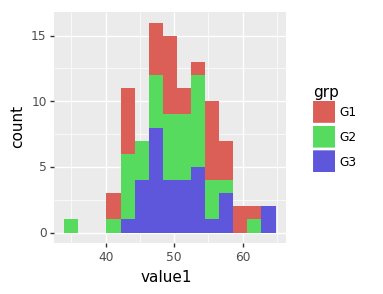

<ggplot: (126021224228)>

In [214]:
ggplot(mydf, aes(x='value1', fill='grp')) + geom_histogram(bins=15)

## Scatter Plot

### 2x Numeric

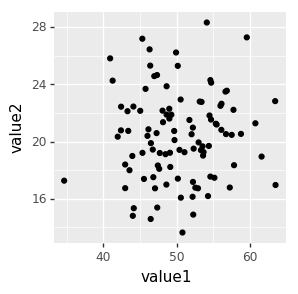

<ggplot: (126021263052)>

In [215]:
ggplot(mydf, aes(x='value1',y='value2')) + geom_point()

### 2x Numeric + 1x Categorical
```
ggplot( DataFrame, aes(x='colName1',y='colName2')) 
    + geom_point( aes(
        color='categorical-alike-colName',
        size='numberColName'
    ))
```

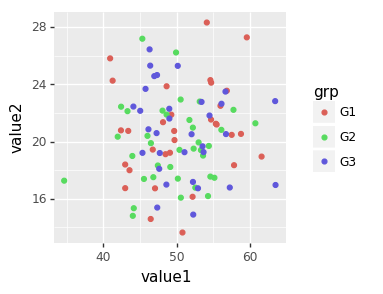

<ggplot: (-9223371910833254221)>

In [216]:
ggplot(mydf, aes(x='value1',y='value2')) + geom_point(aes(color='grp'))

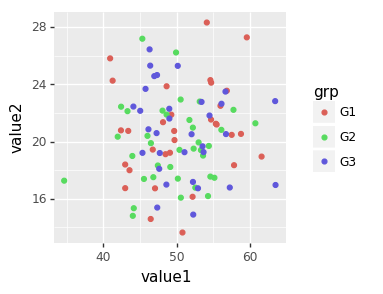

<ggplot: (126021563554)>

In [217]:
ggplot(mydf, aes(x='value1',y='value2',color='grp')) + geom_point()

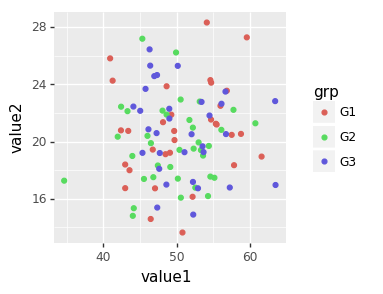

<ggplot: (-9223371910831519905)>

In [218]:
ggplot(mydf, aes(x='value1',y='value2')) + \
    geom_point(aes(
        color='grp'
    ))

### 2x Numeric + 1x Numeric + 1x Categorical

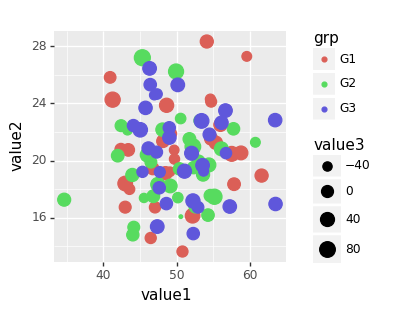

<ggplot: (126021524039)>

In [219]:
ggplot(mydf, aes(x='value1',y='value2')) + \
    geom_point(aes( 
        color='grp', size='value3'
    ))

### Overlay Smooth Line

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:150: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"


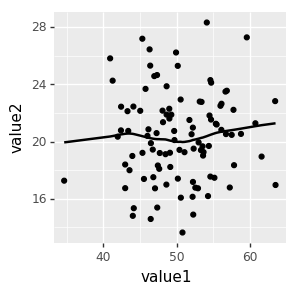

<ggplot: (-9223371910831489469)>

In [220]:
ggplot(mydf, aes(x='value1', y='value2')) + \
    geom_point() + \
    geom_smooth()          # default method='loess'

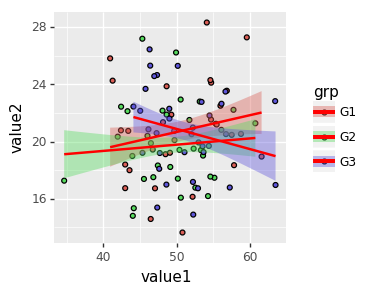

<ggplot: (-9223371910831435674)>

In [221]:
ggplot(mydf, aes(x='value1', y='value2',fill='grp')) + \
    geom_point() + \
    geom_smooth(
        se=True,
        color='red',
        method='lm', 
        level=0.75)

## Line Chart

### 2x Numeric Data

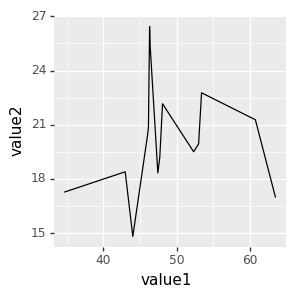

<ggplot: (126023819184)>

In [222]:
ggplot (mydf.head(15), aes(x='value1', y='value2')) + geom_line()

### 1x Numeric, 1x Categorical

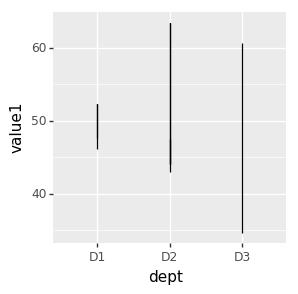

<ggplot: (-9223371910831255748)>

In [223]:
ggplot (mydf.head(15), aes(x='dept', y='value1')) + geom_line()

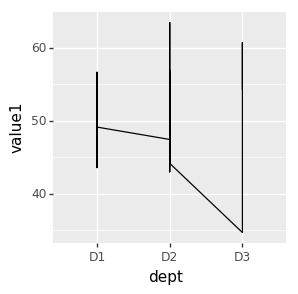

<ggplot: (-9223371910830920360)>

In [224]:
ggplot (mydf.head(30), aes(x='dept', y='value1')) + geom_line( aes(group=1))

### 2x Numeric, 1x Categorical

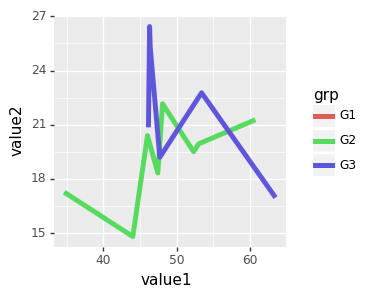

<ggplot: (-9223371910830909678)>

In [225]:
ggplot (mydf.head(15), aes(x='value1', y='value2')) + geom_line( aes(color='grp'),size=2)

## Bar Chart

#### 1x Categorical
Single categorical variable produces frequency chart.

In [226]:
tmpdf = mydf.groupby(['comp'],as_index=False).count()
tmpdf

  comp  dept  grp  value1  value2  value3
0   C1    28   28      28      28      28
1   C2    41   41      41      41      41
2   C3    31   31      31      31      31

In [227]:
tmpdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 6 columns):
comp      3 non-null object
dept      3 non-null int64
grp       3 non-null int64
value1    3 non-null int64
value2    3 non-null int64
value3    3 non-null int64
dtypes: int64(5), object(1)
memory usage: 168.0+ bytes


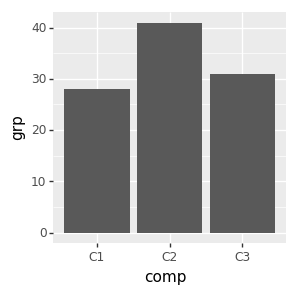

<ggplot: (-9223371910831421454)>

In [228]:
ggplot (tmpdf, aes(x='comp', y='grp')) +geom_col()